# General information
 * Author: Joris Busink, Junior Teacher Physics Education.
 * Date: Fri, 14th Okt.
 * About: Data processing script for high-speed camera. 

## Load packages
I load the following packages: numpy, matplotlib.pyplot, pandas. These pacakges are always usefull in doing nummerical calculations using Python.

In [2]:
# %matplotlib widget #requires package ipympl installed, for interactive plots.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit
np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display of arrays.

cwd = os.getcwd() #get current working directory.
cwd= os.path.split(os.getcwd())[0] 

# Analysis of a pendulum (SHO) using a high speed camera

## Model

In this experiment, I took data from a pendulum using the high speed camera. The data shows us the x-coordinate of the position of the mass.<br>
We can describe the x-position using Newton’s second law of motion and performing a force analysis. 

We get the following differential equation for a simple pendulum:

$\frac{d^2\theta}{dt^2} +\frac{g}{l}\sin{\theta} =0$. 

Using the small angle approximation $\sin{\theta} \approx \theta$ we arrive to

$\frac{d^2\theta}{dt^2} +\frac{g}{l} \theta =0$. 

The solution of this differential equation has the form:

$\theta(t) = A\sin(\omega_n t+\phi)$, with $\omega_n^2 =\frac{g}{l}$.<br>

Finally, in the reference frame of the camera, the equation becomes:<br>

$x(t) = A\sin(\omega_n t+\phi)+x_0$.

A is the amplitude of the pendulum (in the x-direction), $\omega_n$ is the (normal) frequency of the pendulum. 
The frequency depends on the ratio of the gravitational acceleration g and the length of the cord l. <br>
$\phi$ is the phase of the oscillation and $x_0$ is the offset.<br>


## Load, read and filter data from high speed camera
In this section we load, read and filter the data from the high speed camera. <br>
The output data is a .mqa extension, this is program specific extension used by the tracking software.<br>
This, however, is not a problem for Python 3 to handle.

 * Line 1: make dataframe 'df' that contains all data.<br>

 * Line 3-5: change the nummerical separator from a comma to a dot (In the Netherlands we use comma, international standard is a dot.)<br>

 * Line 6-7: remove "Not-a-Number", nan, values from the list.<br>

 * Line 8-11: make a subselection of the data. Handling large datafiles can be very slow and annoying. 
<br>


In [3]:
df=pd.read_csv(cwd+'/data/Slingerdata_1.mqa', sep='\t',header=0)
Time = df['Time'].str.replace(',', '.').astype(float).to_list()
Xpos = df['Point #1.X'].str.replace(',', '.').astype(float).to_list()
Ypos = df['Point #1.Y'].str.replace(',', '.').astype(float).to_list()
Xpos = [x for x in Xpos if str(x) != 'nan']
Ypos = [x for x in Ypos if str(x) != 'nan']

t=np.asarray(Time[:15000]) 
scaling = 1/1000 #scaling factor from pixel to [m]
x = np.asarray(Xpos[0:15000])*scaling 
y = np.asarray(Ypos[0:15000])*scaling 

### Plot the data
In the next lines of code I plot the data. On the y-axis I plot the x-position (m) of pendulum, on the x-axis I plot the time (s). 

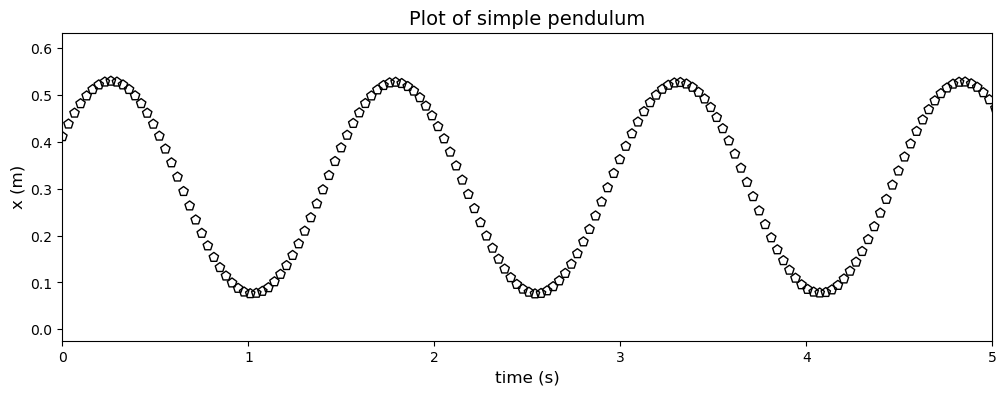

In [4]:
fig, axes = plt.subplots(1,1,figsize=(12,4)) #Creates a single figure with dimensions (12 by 6 (inch))
axes.scatter(t[::10],x[::10] ,color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint t[::10], can be modified.

#plot axis labels,title and adjust limits
axes.set_title('Plot of simple pendulum',fontsize=14)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('x (m)',fontsize=12)
axes.set_xlim(0,5)
axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

plt.show()

### Fit data to model
 * Line 1-2: User defined model based on the theory. We vary the time coordinate (the independent variable, t) and the parameters a-d are determined by a fit. Note that the independent variable (t) must appear<em> before </em> the parameters, otherwise an errormessage will follow.<br>

 * Line 4: Apply a fit using the curve_fit function. Curve_fit asks for three input arguments (model, independent variable (t), dependent variable (x)), more input is optional.<br>
 In this case, I provide an initial guess of the optimal parameters (p0) and some bounds to the parameters. Other options include: weights, bounds, etc. <br>
 Note that providing a good initial guess and bounds significantly reduces the complexity of findings the optimal parameters, if possible, provided them!<br>
 The output of curve_fit is popt (optimal parameter) and pcov (the covariance matrix $\mathcal{K_{p_i p_j}}$ ): <br>

 * $\mathcal{K_{p_i p_j}}= \begin{bmatrix} s_{p_a p_a} & s_{p_b p_a} \\ s_{p_a p_b} & s_{p_b p_b} \end{bmatrix}$. <br>
 
 * $s_{p_a p_a}$ is the covariance of parameter a. To calculate the standard deviation of the parameter we take the square root of the variance
     $\sigma_{aa} = \sqrt{s_{p_a p_a}} $ the standard deviation of the estimated parameter.


 * Line 6-8: Show the optimal values that curve_fit found. <br>

 * Line 10-16: Make figure, plot the data (black) and the fit (darkred).<br>

 ### Optional commands
* Line 29-30: Save the figure. Note that the figure is saved as a .svg extension. A .svg extension stands for Scalable Vector Image, the image is saved as an object (and not as a collection of pixels). One can import .svg picture in e.g. inkscape or adobe photoshop to manipulate these.<br>

The optimal value for  Offset (m) is: 0.30 +- 0.00003
The optimal value for  Amplitude (m) is: 0.22 +- 0.00005
The optimal value for  Frequency (rad/s) is: 4.12 +- 0.00002
The optimal value for  phase (rad) is: 0.48 +- 0.00043


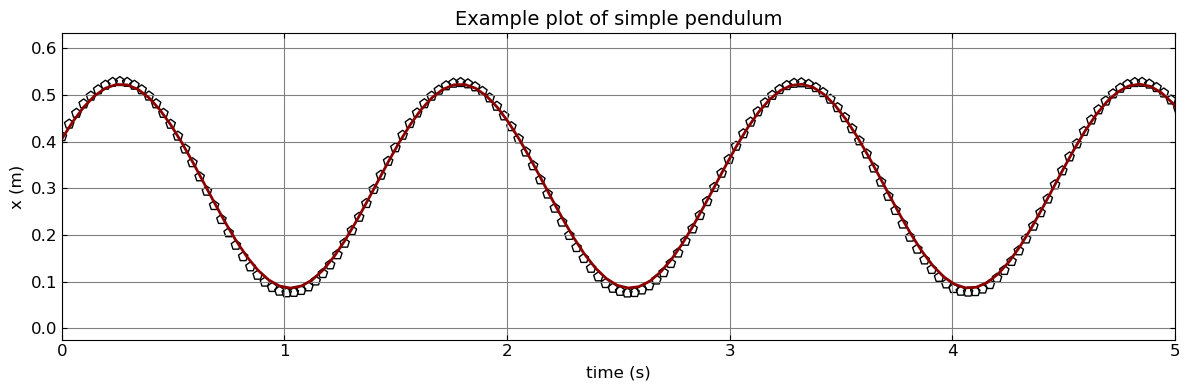

In [5]:
def model(t,a,b,c,d):
    return a+b*np.sin(c*t+d)

popt, pcov = curve_fit(model,t,x,p0=[0.3,0.23,4.12,0.5],bounds = ([0.1,0.2,2,0],[0.5,0.5,10,2*np.pi]))

parameter=['Offset (m)', 'Amplitude (m)', 'Frequency (rad/s)', 'phase (rad)']
for i in range (4):
    print("The optimal value for ", parameter[i], 'is:', "{:.2f}".format(popt[i]), '+-', "{:.5f}".format(np.sqrt(pcov[i,i])))

xfit = np.linspace(0,max(t),1000) #create new data for fit.

#Plot data + fit        
fig,axes=plt.subplots(1,1,figsize=(12,4),sharex=True,sharey=True)
axes.scatter(t[::10],x[::10] ,color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint [::10]
axes.plot(xfit,model(xfit,*popt), color ='darkred', lw = 2) #plot fit

#plot axis labels and limits
axes.set_title('Example plot of simple pendulum',fontsize=14)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('x (m)',fontsize=12)
axes.set_xlim(0,5)
axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

#Some plot settings
axes.tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
axes.grid(True,color='gray')
plt.tight_layout() #creates optimal padding levels for figure (especially usefull for side-by-side figures)

# location='Path' #Path to your prefered location, e.g. User/Downloads/
# plt.savefig(location+'simple_pendulum.svg') #Extension can be .png/.jpg/.etc or .svg/.pdf (Vector Image)

plt.show()


### Calculate derivative (nummerical & analytical)
<p>In the previous section we plotted the data of the simple pendulum. The data looks very smooth and we can described the data (very well) by a simple pendulum model.<br>
 However, in most situations, we are not interested in the position of the object, but we are interested in the velocity or (even) the acceleration of an object. <br>
 If one has a (analytical) function that describes the position as a function of time, we can simply derive the velocity (or acceleration) by taking the (second) derivative with respect to time. Therefore</p> 

 * $x(t) = A\sin(\omega_n t+\phi)+x_0$;<br>

 * $v(t) = \frac{dx(t)}{dt} = \omega_n A \cos(\omega_n+\phi)$;<br>

 * $a(t) = \frac{d^2x(t)}{dt^2} = -\omega_n^2 A \sin(\omega_n+\phi)$.<br>

<p> The velocity (v) and acceleration (a) can be approximated using the estimated parameters (previous section).<br> 

However, in most (realistic) (bio)mechanical systems, we do not have an exact model that describes our measurements. 
We are forced to calculate a derivative using nummerical methods. A straigthforward method to calculate the derivative of a dataset is to use the <em>Euler</em> forward, backward or central method. <br>
The Euler central method works as following:<br>

 * $ f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$.<br> 
 
 An intuitive explanation is that we approximate the derivative by evaluating the function $f(x)$ at $f(x+h)$ and $f(x-h)$, with h the stepsize. Next, we take the difference of these expressions and divide by twice the stepsize. The smaller the stepsize we use, the better the approximation will be! Other (more advanced) methods to approximate a derivative of a function f(x) are based on higher-order derivatives. These methods are ofter more precise (or faster), but are cumbersome to implement.</p>

In Python, we can take the gradient function to calculate the derivative. It uses the Euler central method. Note that at the boundaries $t=t_0$ or $t=t_{final}$, the central method fails to work. However, the numpy gradient function switches to Euler forward/backward method to compensate for the loss of data at the edges.

The following links can provide some more information about the used methods.<br>
 * [Numpy Gradient function](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html)<br>
 * [Nummerical Differentiation using Python](https://personal.math.ubc.ca/~pwalls/math-python/differentiation/differentiation/
)

### The code
 * Line 1-2: I take the derivative of the position data with respect to time (line 1). In line 2 I take the second derivative, to obtain the acceleration.<br>
 * Line 4-12: I make a figure of 1 row and 3 columns. I plot the x-t data (black pentagons) (panel 1) and model (solid line, darkred). In panel 2 and 3 I plot the velocity and acceleration versus time.<br>
 * Line 14-33: Some aesthetic aspects of the plot.<br>

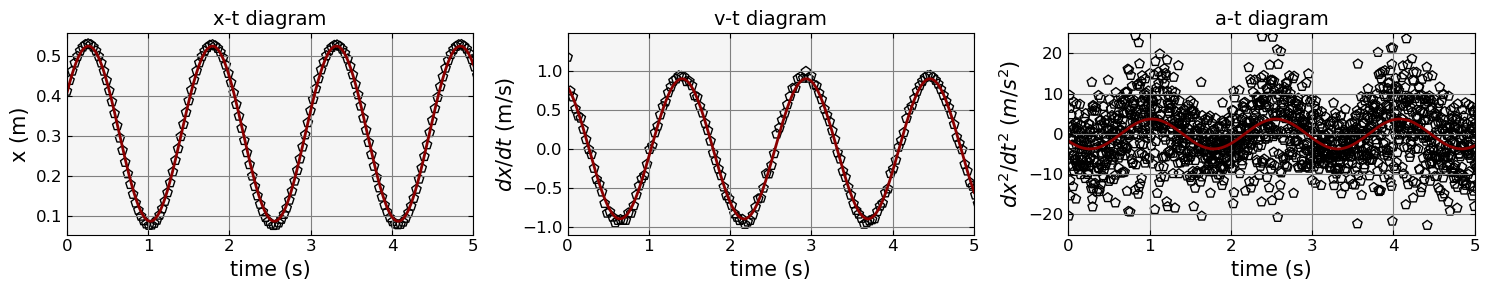

In [6]:
der1 = np.gradient(x,t)
der2 = np.gradient(der1,t)

fig,axes=plt.subplots(1,3,figsize=(15,3))
axes[0].scatter(t[::10],x[::10],color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint [::10]
axes[0].plot(t,model(t,*popt),color='darkred',lw=2)

axes[1].scatter(t[::10], der1[::10], color='black', s = 50, marker ='p',ec='black',fc='none')
axes[1].plot(t,popt[2]*popt[1]*np.cos(popt[2]*t+popt[3]),color='darkred',lw=2)

axes[2].scatter(t[::], der2[::], color='black', s = 50, marker ='p',ec='black',fc='none')
axes[2].plot(t,-popt[2]**2*popt[1]*np.sin(popt[2]*t+popt[3]),color='darkred',lw=2)

axes[2].set_ylim(-25,25)
axes[0].set_title('x-t diagram',fontsize=14)
axes[1].set_title('v-t diagram',fontsize=14)
axes[2].set_title('a-t diagram',fontsize=14)

for i in range(3):
    axes[i].set_xlim(0,5)
    axes[i].set_xlabel('time (s)',fontsize=15)
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
    axes[i].set_facecolor('whitesmoke')
    axes[i].grid(True,color='gray')

axes[0].set_ylabel('x (m)',fontsize=15)
axes[1].set_ylabel(r'$dx/dt$ (m/s)',fontsize=15)
axes[2].set_ylabel(r'$dx^2/dt^2$ $(m/s^2)$',fontsize=15)
plt.tight_layout()
plt.show()

# location='user_defined_location'
# plt.savefig('location'+'simple_pendulum.svg')

### Results
In the previous figure, we observe that x-t and v-t diagram still look reasonable. However, the a-t diagram is <em>very</em> chaotic. It is difficult to observe the expected (analytical) acceleration. Before we try to resolve this issue, we first have to understand it a bit better.<br>

The noisy data is a result of the method to calculate a derivative:
 * $ f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$.<br> 
 
 In our experiment, we use a high-speed camera, that produces (around) 500 fps. This means that we have a timestep of h = 1/fps = 0.002 seconds. Any observed difference in x(t) is magnified in the calculation of the velocity by ~$h^-1$ and even by ~$h^-2$ for the acceleration. This is in principle not a problem of the method, but of the finite resolution of the camera. If we would have an even faster acquistion rate (fps) we could in principle obscure single pixel differences between frames. The downside is that, between these frames the acceleration is $a=1$ $/h^2$ $[pixel/s^2]$. The acceleration that we obtain therefore depends on the resolution of the camera.  

 In practice, we also have to deal with noise, this makes the method to calculate a derivative even more problematic. To resolve these issues we can do methods: 
  * Decrease resolution of temporal data;
  * Apply a smoothing technique to reduce the effect of noise.

  Both methods decrease the resolution of the temporal data. In most (bio)mechanical experiments, this is not an issue.

## Method 1: Change temporal resolution (easy)
In this method we decrease the temporal resolution of the data. Instead of taking the derivative between each consequtive point, we calculate the derivative of each n-th consequtive point n $\in$ {1,2,3,4}. We therefore (effectively) average the data in between the data that we do not use. This also implies that we could've decreased our acquisition rate by a factor n.

The downside of this method, is that we throw away a lot of data that couldbe potentially useful. 

### Necessary commands
 * line 2: define the n-th consequtive point.
 * line 7-10: decrease the resolution of the time and position data. Calculate the new velocities and acceleration.
 * line 11-12: plot nummerical and analytical derivative of the data.


0
1
2
3


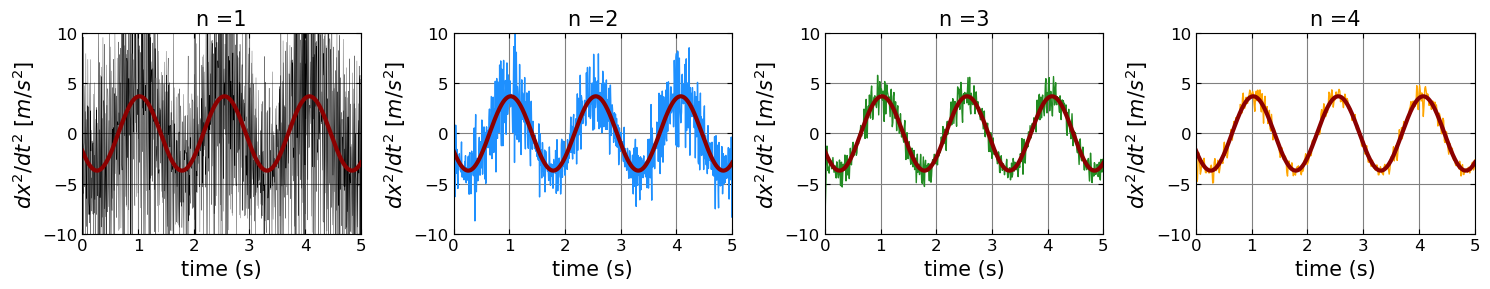

In [7]:
fig,axes=plt.subplots(1,4,figsize=(15,3))
slicelist= [1,2,3,4]
lwlist=[.2,1,1,1,1]
colorlist=['black','dodgerblue','forestgreen','orange','purple']
for i in range(len(slicelist)):
    print(i)
    x2 = x[::slicelist[i]]
    t2 = t[::slicelist[i]]
    der_slice1 = np.gradient(x2,t2)
    der_slice2 = np.gradient(der_slice1,t2)
    
    axes[i].plot(t2,der_slice2,color = colorlist[i],lw=lwlist[i])
    axes[i].plot(t,-popt[2]**2*popt[1]*np.sin(popt[2]*t+popt[3]),color='darkred',lw=3)
    
    axes[i].set_title("n =" + str(slicelist[i]),fontsize=15)
    axes[i].set_ylim(-10,10)
    axes[i].set_xlim(0,5)
    axes[i].set_xlabel('time (s)',fontsize=15)
    
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
    axes[i].grid(True,color='gray')
    axes[i].set_ylabel(r'$dx^2/dt^2$ $[m/s^2]$',fontsize=15)
plt.tight_layout()


## Method 2: Smoothing data (harder)
In this method we apply a smoothing technique to our data. Our starting point is the very noisy acceleration data. Instead of cropping the data, we can apply a smoothing technique: Savitzky-Golay filtering.<br> 
The “savgol” filter is often used as a preprocessing in spectroscopy and signal processing. The filter can be used to reduce high frequency noise in a signal due to its smoothing properties and reduce low frequency signal (e.g., due to offsets and slopes) using differentiation [1]. 

**The Savitzky-Golay (savgol) Filter:**  <br>
For a given signal measured at N points and a filter of width, w, savgol calculates a polynomial fit of order o in each filter window as the filter is moved across the signal [1].<br>
The result of this operation is a smoothened curve of the data. The downside is, just like the previous method, that the high-frequency components of the data are removed,<br> 
i.e. a decrease in the resolution of the data [2].

 * [[1] Savitzky-Golay Smoothing and Differentiation Filter](https://eigenvector.com/wp-content/uploads/2020/01/SavitzkyGolay.pdf)<br>
 * [[2] Savitzky-Golay Smoothing Filters](http://phys.uri.edu/nigh/NumRec/bookfpdf/f14-8.pdf)<br>

### Necessary commands
 * line 1: import savgol_filter
 * line 4: define the number of neighbours (width) of the filter. 

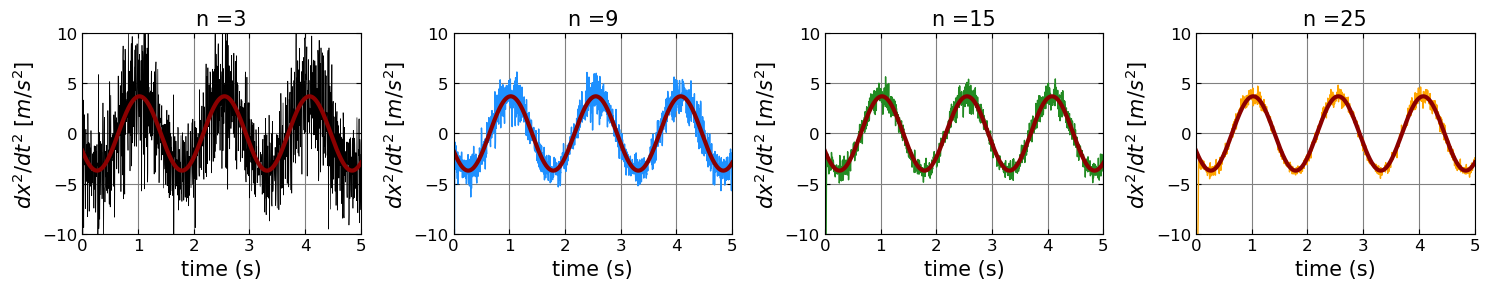

In [8]:
from scipy.signal import savgol_filter

fig,axes=plt.subplots(1,4,figsize=(15,3))
neighbourlist= [3,9,15,25]
lwlist=[.5,1,1,1,1]
colorlist=['black','dodgerblue','forestgreen','orange','purple']

for i in range(len(slicelist)):
    axes[i].plot(t, savgol_filter(der2,neighbourlist[i],1),color = colorlist[i],lw=lwlist[i])
    axes[i].plot(t,-popt[2]**2*popt[1]*np.sin(popt[2]*t+popt[3]),color='darkred',lw=3)
    
    axes[i].set_title("n =" + str(neighbourlist[i]),fontsize=15)
    axes[i].set_ylim(-10,10)
    axes[i].set_xlim(0,5)
    axes[i].set_xlabel('time (s)',fontsize=15)
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
    axes[i].grid(True,color='gray')
    axes[i].set_ylabel(r'$dx^2/dt^2$ $[m/s^2]$',fontsize=15)
plt.tight_layout()



## Discussion
In the previous two figures, we observe the same trend, as we increase the strength of the filtering, the nummerical acceleration $a^{w}_{obs}$ <br>
converges towards the analytical acceleration $a_{model}$ (based on a simple pendulum). The nummerical acceleration $a^{w}_{obs}$ depends on the window width, i.e. the savgol_filter width or the concatenated data method. 

In principle we could quanitfy the deviation using the Mean Squared Error (MSE): <br>

$ MSE = \frac{1}{N}\sum_{n=1}^{n=N}(a^{w}_{obs}(t)-a_{model}(t))^2 .$

The value of the MSE is a measure of the deviation between the data and the model. This deviation is, in priniciple, a function of the window-width, and is therefore problem specific.

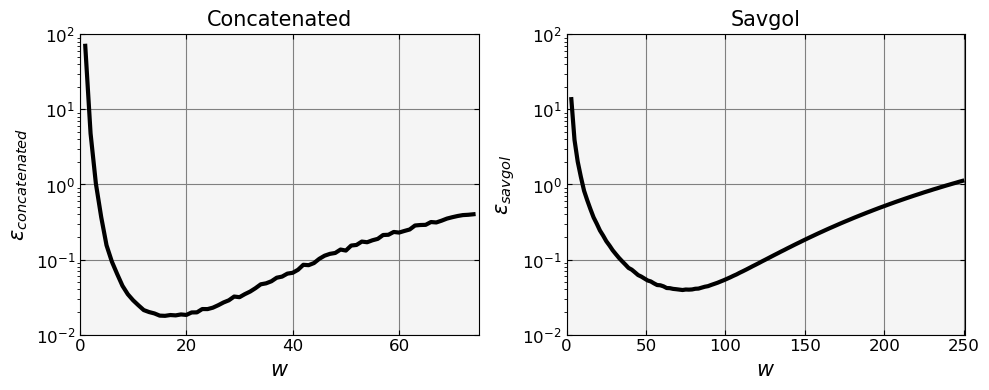

73
16


In [9]:
epsilon_concatenated,epsilon_savgol  = [],[]
for i in range(3,251,2):
    epsilon = 1/len(savgol_filter(der2,i,1))*np.sum((savgol_filter(der2,i,1)[i:] + popt[2]**2*popt[1]*np.sin(popt[2]*t[i:]+popt[3]))**2)
    epsilon_savgol.append(epsilon)
for j in range(1,75,1):
    x2,t2 = x[::j],t[::j]
    der_slice1 = np.gradient(x2,t2)
    der_slice2 = np.gradient(der_slice1,t2)
    epsilon_conc = 1/len(der_slice2)*np.sum((der_slice2[j:]+ popt[2]**2*popt[1]*np.sin(popt[2]*t2[j:]+popt[3]))**2)
    epsilon_concatenated.append(epsilon_conc)
    
fig,axes = plt.subplots(1,2,figsize=(10,4))
axes[0].set_title("Concatenated",fontsize=15)
axes[1].set_title("Savgol",fontsize=15)

axes[0].plot(np.arange(1,75,1),epsilon_concatenated, color ='black', lw=3)
axes[1].plot(np.arange(3,251,2),epsilon_savgol,color ='black',lw=3)

axes[0].set_xlim(0,75)
axes[1].set_xlim(0,251)
axes[0].set_ylabel(r'$\epsilon_{concatenated}$',fontsize=15)
axes[1].set_ylabel(r'$\epsilon_{savgol}$',fontsize=15)
for i in range(2):
    axes[i].set_xlabel('$w$',fontsize=15)
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
    axes[i].set_facecolor('whitesmoke')
    axes[i].grid(True,color='gray')
    axes[i].set_ylim(0.01,100)
    axes[i].set_yscale('log')
plt.tight_layout()
plt.show()

print(np.arange(3,253,2)[np.argmin(epsilon_savgol)])
print(np.arange(1,75,1)[np.argmin(epsilon_concatenated)])

## Minimal error graphs

In the previous section, I calculated the optimal parameters for the Concatenated method and the Savgol method. Although the first method works slightly better, the savgol method also performs very well. In the next section I show the optimized nummerical acceleration on top of the analytical solution. 

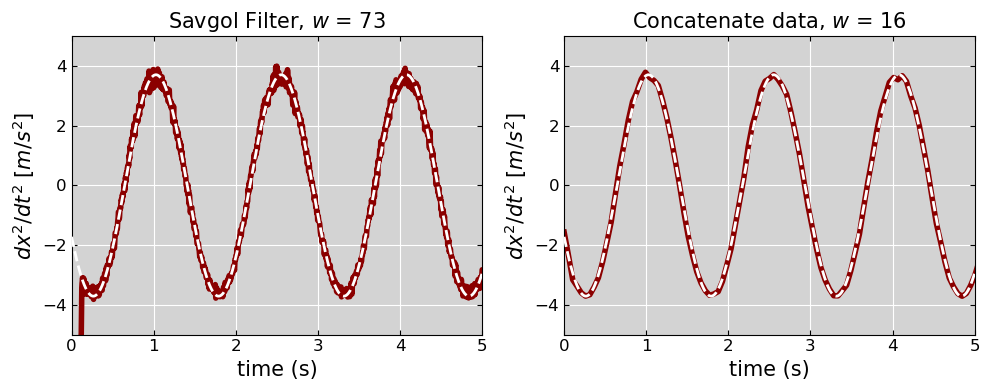

In [10]:
x_opt = x[::16]
t_opt = t[::16]
der_slice1 = np.gradient(x_opt,t_opt)
der_slice2 = np.gradient(der_slice1,t_opt)

fig,axes=plt.subplots(1,2,figsize=(10,4))
axes[0].plot(t, savgol_filter(der2,73,1),color = 'darkred',lw=4,zorder=2)
axes[0].plot(t,-popt[2]**2*popt[1]*np.sin(popt[2]*t+popt[3]),color='white',lw=2,zorder=3,ls='--')
axes[0].set_title('Savgol Filter, $w$ = 73',fontsize=15)
axes[1].plot(t_opt,der_slice2,color ='darkred',lw=4,zorder=2)
axes[1].plot(t,-popt[2]**2*popt[1]*np.sin(popt[2]*t+popt[3]),color='white',lw=2,zorder=3,ls='--')
axes[1].set_title('Concatenate data, $w$ = 16',fontsize=15)

for i in range(2):
    axes[i].set_ylim(-5,5)
    axes[i].set_xlim(0,5)
    axes[i].set_xlabel('time (s)',fontsize=15)
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
    axes[i].set_facecolor('lightgray')
    axes[i].grid(True,color='white')
    axes[i].set_ylabel(r'$dx^2/dt^2$ $[m/s^2]$',fontsize=15)
plt.tight_layout()
plt.show()

# Data Kick

In the previous example, we had an analytical model. However, in most (bio)mechanical experiments, there's not an analytical model that describes the process of interest. In the next sections I will (quickly) go over the data of a kick. The data was, just as before, captures with a high-speed camera.

In [11]:
df=pd.read_csv(cwd+'/data/schop.csv', sep='\t',header=0)
Time = df['Time'].str.replace(',', '.').astype(float).to_list()
Angle = df['Angle #1'].str.replace(',', '.').astype(float).to_list()
Angle =np.asarray(Angle)*np.pi/180

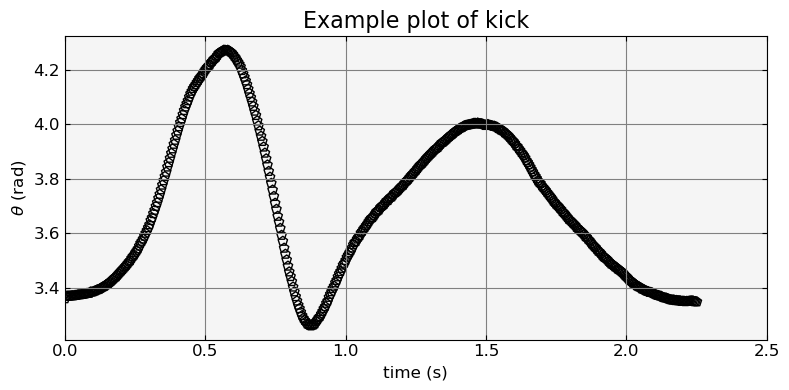

In [12]:
fig,axes=plt.subplots(1,1,figsize=(8,4))
axes.set_title('Example plot of kick',fontsize=16)
axes.scatter(Time,Angle ,color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint [::10]
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel(r'$\theta$ (rad)',fontsize=12)
axes.set_xlim(0,2.5)
axes.tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
axes.set_facecolor('whitesmoke')
axes.grid(True,color='gray')
plt.tight_layout() #creates optimal padding levels for figure (especially usefull for side-by-side figures)
plt.show()

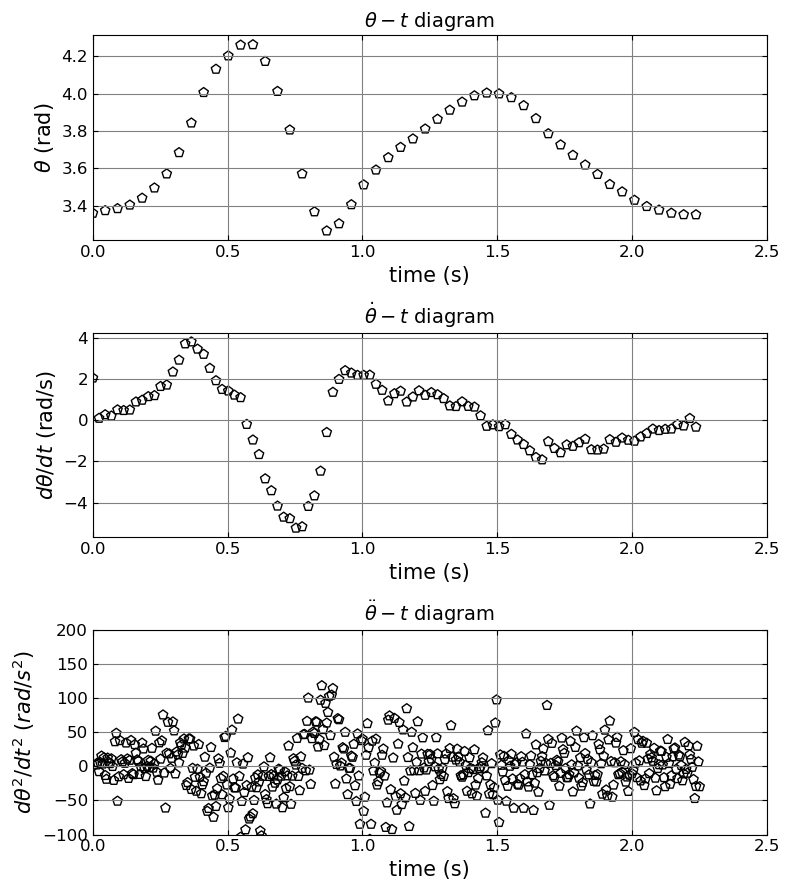

In [13]:
der1 = np.gradient(Angle,Time)
der2 = np.gradient(der1,Time)

fig,axes=plt.subplots(3,1,figsize=(8,9))
axes[0].scatter(Time[::10],Angle[::10],color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint [::10]

axes[1].scatter(Time[::5], der1[::5], color='black', s = 50, marker ='p',ec='black',fc='none')

axes[2].scatter(Time[::], der2[::], color='black', s = 50, marker ='p',ec='black',fc='none')


axes[0].set_title(r'$\theta-t$ diagram',fontsize=14)
axes[1].set_title(r'$\dot{\theta}-t$ diagram',fontsize=14)
axes[2].set_title(r'$\ddot{\theta}-t$ diagram',fontsize=14)
axes[2].set_ylim(-100,200)
for i in range(3):
    axes[i].set_xlim(0,2.5)
    axes[i].set_xlabel('time (s)',fontsize=15)
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
    axes[i].grid(True,color='gray')

axes[0].set_ylabel(r'$\theta$ (rad)',fontsize=15)
axes[1].set_ylabel(r'$d\theta/dt$ (rad/s)',fontsize=15)
axes[2].set_ylabel(r'$d\theta^2/dt^2$ $(rad/s^2)$',fontsize=15)
plt.tight_layout()
plt.show()

# location='user_defined_location'
# plt.savefig('location'+'simple_pendulum.svg')

## Filtered data Kick

Just as before, we apply a filter to the data. However, we cannot use the same filtering window (w). During the analysis, the filtering window has to be checked manually. The optimal window width is always a trade-off between the resolution of the data and the details of the analysis. To make this analysis a little less subjective, one can lay the filtered data on top of the original data. 

1 118.1409601587865
2 93.24948013612537
3 76.3720579076639
4 70.16596488493043
5 67.59772647268738
6 64.46121607740493
7 62.376272787694255
8 57.385285569467186
9 57.310274094197865


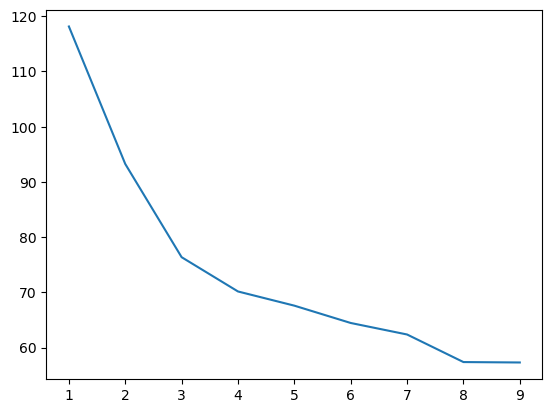

In [14]:
windowlist = []
maxlist = []

for i in range(1,10,1):
    x_opt = Angle[::i]
    t_opt = Time[::i]
    der_slice1 = np.gradient(x_opt,t_opt)
    der_slice2 = np.gradient(der_slice1,t_opt)
    windowlist.append(i)
    maxlist.append(np.max(der_slice2))
    print(i,np.max(der_slice2))

plt.plot(windowlist,maxlist)
# plt.yscale('log')

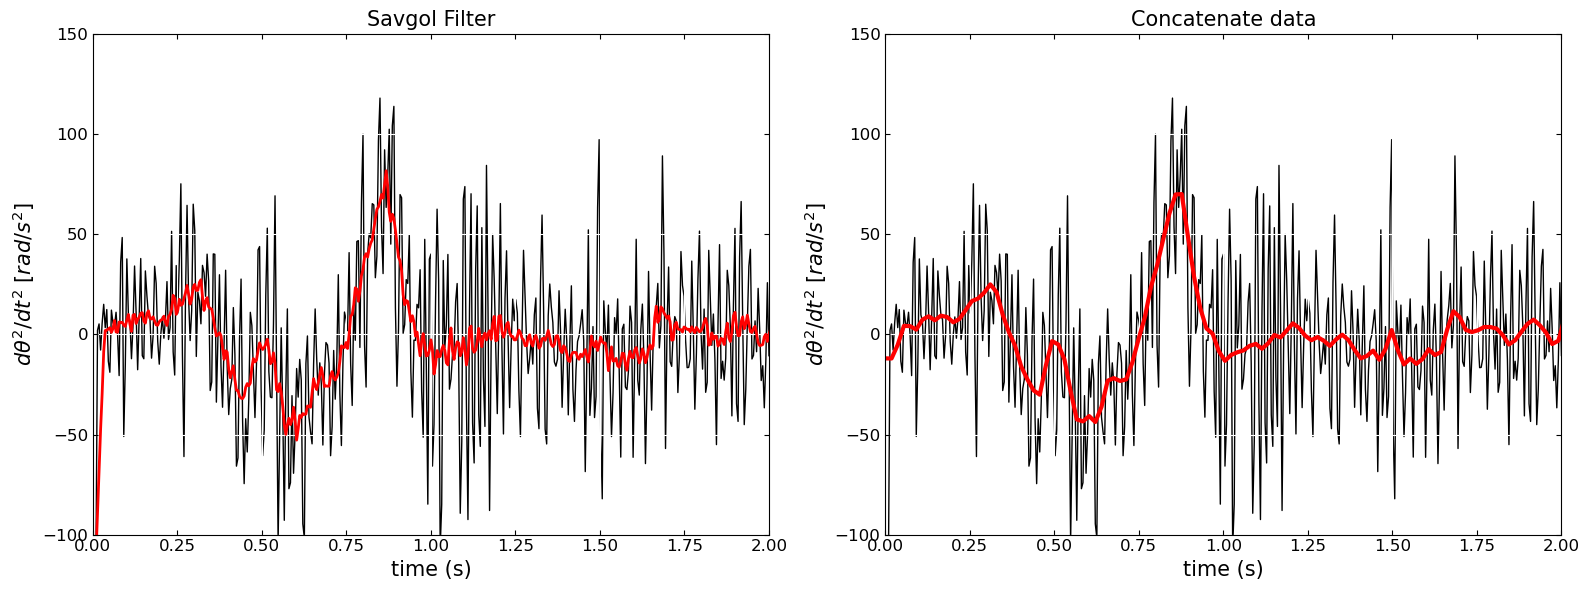

In [16]:
x_opt = Angle[::4]
t_opt = Time[::4]
der_slice1 = np.gradient(x_opt,t_opt)
der_slice2 = np.gradient(der_slice1,t_opt)

fig,axes=plt.subplots(1,2,figsize=(16,6))
axes[0].plot(Time, der2,color = 'black',lw=1,zorder=1)
axes[0].plot(Time, savgol_filter(der2,11,1),color = 'red',lw=2,zorder=2)
axes[0].set_title('Savgol Filter',fontsize=15)

axes[1].plot(t_opt,der_slice2,color ='red',lw=3,zorder=2)
axes[1].plot(Time, der2,color = 'black',lw=1,zorder=1)
axes[1].set_title('Concatenate data',fontsize=15)

for i in range(2):
    axes[i].set_ylim(-100,150)
    axes[i].set_xlim(0,2)
    axes[i].set_xlabel('time (s)',fontsize=15)
    axes[i].tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
    axes[i].set_ylabel(r'$d\theta^2/dt^2$ $[rad/s^2]$',fontsize=15)
    axes[i].grid(True,color='white')


plt.tight_layout()
plt.show()